<a href="https://colab.research.google.com/github/tpq4ew/DS-4002-Project2/blob/main/Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

In [4]:
# List of file paths and corresponding years
file_paths = ["MERGED1996_97_PP.csv", "MERGED1997_98_PP.csv", "MERGED1998_99_PP.csv", "MERGED1999_00_PP.csv", "MERGED2000_01_PP.csv", "MERGED2001_02_PP.csv", "MERGED2002_03_PP.csv", "MERGED2003_04_PP.csv", "MERGED2004_05_PP.csv", "MERGED2005_06_PP.csv", "MERGED2006_07_PP.csv", "MERGED2007_08_PP.csv", "MERGED2008_09_PP.csv", "MERGED2009_10_PP.csv", "MERGED2010_11_PP.csv", "MERGED2011_12_PP.csv", "MERGED2012_13_PP.csv", "MERGED2013_14_PP.csv", "MERGED2014_15_PP.csv", "MERGED2015_16_PP.csv", "MERGED2016_17_PP.csv", "MERGED2017_18_PP.csv", "MERGED2018_19_PP.csv", "MERGED2019_20_PP.csv", "MERGED2020_21_PP.csv", "MERGED2021_22_PP.csv", "MERGED2022_23_PP.csv"]
years = [1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]  # The corresponding year for each file

# Define the columns to keep
columns_to_keep = [ 'STABBR', 'COSTT4_A','ADM_RATE', 'UNITID', 'CONTROL']

data_frames = []

# Step 1: Load each dataset, filter relevant columns, add Year, and store them in a list
for i, file in enumerate(file_paths):
    df = pd.read_csv(file)
    df_filtered = df[columns_to_keep]  # Keep only the necessary columns
    df_filtered['Year'] = years[i]  # Add the corresponding year
    data_frames.append(df_filtered)

<ipython-input-4-bb0a80ad342e>:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-4-bb0a80ad342e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Year'] = years[i]  # Add the corresponding year
<ipython-input-4-bb0a80ad342e>:12: DtypeWarning: Columns (1,1537,1540,1542,1606,1608,1614,1615) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-4-bb0a80ad342e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [5]:
# prompt: merge each of the cleaned dataframes on UNITID and display the dataframe

# Merge the dataframes
merged_df = data_frames[0]
for i in range(1, len(data_frames)):
    merged_df = pd.merge(merged_df, data_frames[i], on='UNITID', how='outer', suffixes=('', f'_{i+1}'))

# Display the merged dataframe
merged_df

,STABBR,COSTT4_A,ADM_RATE,UNITID,CONTROL,Year,STABBR_2,COSTT4_A_2,ADM_RATE_2,CONTROL_2,...,STABBR_26,COSTT4_A_26,ADM_RATE_26,CONTROL_26,Year_26,STABBR_27,COSTT4_A_27,ADM_RATE_27,CONTROL_27,Year_27
0,AL,NaN,NaN,100636,1.0,1996.0,AL,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,NaN,NaN,100654,1.0,1996.0,AL,NaN,NaN,1.0,...,AL,21924.0,0.7160,1.0,2021.0,AL,23167.0,0.6840,1.0,2022.0
2,AL,NaN,NaN,100663,1.0,1996.0,AL,NaN,NaN,1.0,...,AL,26248.0,0.8854,1.0,2021.0,AL,26257.0,0.8668,1.0,2022.0
3,AL,NaN,NaN,100672,1.0,1996.0,AL,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AL,NaN,NaN,100690,2.0,1996.0,AL,NaN,NaN,2.0,...,AL,NaN,NaN,2.0,2021.0,AL,NaN,NaN,2.0,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12283,NaN,NaN,NaN,49576720,NaN,NaN,NaN,NaN,NaN,NaN,...,PA,NaN,NaN,1.0,2021.0,NaN,NaN,NaN,NaN,NaN
12284,NaN,NaN,NaN,49576721,NaN,NaN,NaN,NaN,NaN,NaN,...,PA,NaN,NaN,1.0,2021.0,NaN,NaN,NaN,NaN,NaN
12285,NaN,NaN,NaN,49576722,NaN,NaN,NaN,NaN,NaN,NaN,...,PA,NaN,NaN,1.0,2021.0,NaN,NaN,NaN,NaN,NaN
12286,NaN,NaN,NaN,49576723,NaN,NaN,NaN,NaN,NaN,NaN,...,PA,NaN,NaN,1.0,2021.0,NaN,NaN,NaN,NaN,NaN


In [6]:
# prompt: keep observations where CONTROL = 1

# Keep only observations where CONTROL = 1
merged_df = merged_df[merged_df['CONTROL'] == 1]
merged_df

,STABBR,COSTT4_A,ADM_RATE,UNITID,CONTROL,Year,STABBR_2,COSTT4_A_2,ADM_RATE_2,CONTROL_2,...,STABBR_26,COSTT4_A_26,ADM_RATE_26,CONTROL_26,Year_26,STABBR_27,COSTT4_A_27,ADM_RATE_27,CONTROL_27,Year_27
0,AL,NaN,NaN,100636,1.0,1996.0,AL,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,NaN,NaN,100654,1.0,1996.0,AL,NaN,NaN,1.0,...,AL,21924.0,0.7160,1.0,2021.0,AL,23167.0,0.6840,1.0,2022.0
2,AL,NaN,NaN,100663,1.0,1996.0,AL,NaN,NaN,1.0,...,AL,26248.0,0.8854,1.0,2021.0,AL,26257.0,0.8668,1.0,2022.0
3,AL,NaN,NaN,100672,1.0,1996.0,AL,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AL,NaN,NaN,100706,1.0,1996.0,AL,NaN,NaN,1.0,...,AL,24869.0,0.7367,1.0,2021.0,AL,25777.0,0.7810,1.0,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7416,GA,NaN,NaN,423476,1.0,1996.0,GA,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7427,OR,NaN,NaN,423652,1.0,1996.0,OR,NaN,NaN,1.0,...,OR,17548.0,NaN,1.0,2021.0,OR,16769.0,NaN,1.0,2022.0
7487,MO,NaN,NaN,428301,1.0,1996.0,MO,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7488,MO,NaN,NaN,428310,1.0,1996.0,MO,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# prompt: remove observations where any CONTROL variable is not 1

# Assuming 'merged_df' is already defined as in the previous code.

# Define the control columns to check (assuming all CONTROL columns have similar naming pattern)
control_columns = [col for col in merged_df.columns if 'CONTROL' in col]

# Filter the DataFrame
merged_df = merged_df[merged_df[control_columns].isin([1]).all(axis=1)]

merged_df

,STABBR,COSTT4_A,ADM_RATE,UNITID,CONTROL,Year,STABBR_2,COSTT4_A_2,ADM_RATE_2,CONTROL_2,...,STABBR_26,COSTT4_A_26,ADM_RATE_26,CONTROL_26,Year_26,STABBR_27,COSTT4_A_27,ADM_RATE_27,CONTROL_27,Year_27
1,AL,NaN,NaN,100654,1.0,1996.0,AL,NaN,NaN,1.0,...,AL,21924.0,0.7160,1.0,2021.0,AL,23167.0,0.6840,1.0,2022.0
2,AL,NaN,NaN,100663,1.0,1996.0,AL,NaN,NaN,1.0,...,AL,26248.0,0.8854,1.0,2021.0,AL,26257.0,0.8668,1.0,2022.0
5,AL,NaN,NaN,100706,1.0,1996.0,AL,NaN,NaN,1.0,...,AL,24869.0,0.7367,1.0,2021.0,AL,25777.0,0.7810,1.0,2022.0
6,AL,NaN,NaN,100724,1.0,1996.0,AL,NaN,NaN,1.0,...,AL,21938.0,0.9799,1.0,2021.0,AL,21900.0,0.9660,1.0,2022.0
7,AL,NaN,NaN,100751,1.0,1996.0,AL,NaN,NaN,1.0,...,AL,31050.0,0.7890,1.0,2021.0,AL,31024.0,0.8006,1.0,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7340,OR,NaN,NaN,420556,1.0,1996.0,OR,NaN,NaN,1.0,...,OR,14566.0,NaN,1.0,2021.0,OR,15918.0,NaN,1.0,2022.0
7347,OR,NaN,NaN,420723,1.0,1996.0,OR,NaN,NaN,1.0,...,OR,11180.0,NaN,1.0,2021.0,OR,11613.0,NaN,1.0,2022.0
7375,OH,NaN,NaN,421717,1.0,1996.0,OH,NaN,NaN,1.0,...,OH,NaN,NaN,1.0,2021.0,OH,NaN,NaN,1.0,2022.0
7427,OR,NaN,NaN,423652,1.0,1996.0,OR,NaN,NaN,1.0,...,OR,17548.0,NaN,1.0,2021.0,OR,16769.0,NaN,1.0,2022.0


In [8]:
# prompt: export as a CSV

# Export the DataFrame to a CSV file
merged_df.to_csv('merged_data.csv', index=False)

In [9]:
# prompt: drop all columns up to column Year_13

# Assuming 'merged_df' is already defined as in the previous code.

# Find the index of the 'Year_13' column
year_13_index = merged_df.columns.get_loc('Year_13')

# Drop all columns up to 'Year_13' (exclusive)
merged_df = merged_df.iloc[:, year_13_index:]

merged_df

,Year_13,STABBR_14,COSTT4_A_14,ADM_RATE_14,CONTROL_14,Year_14,STABBR_15,COSTT4_A_15,ADM_RATE_15,CONTROL_15,...,STABBR_26,COSTT4_A_26,ADM_RATE_26,CONTROL_26,Year_26,STABBR_27,COSTT4_A_27,ADM_RATE_27,CONTROL_27,Year_27
1,2008.0,AL,13242.0,0.4726,1.0,2009.0,AL,13762.0,0.5129,1.0,...,AL,21924.0,0.7160,1.0,2021.0,AL,23167.0,0.6840,1.0,2022.0
2,2008.0,AL,16955.0,0.8357,1.0,2009.0,AL,18003.0,0.8243,1.0,...,AL,26248.0,0.8854,1.0,2021.0,AL,26257.0,0.8668,1.0,2022.0
5,2008.0,AL,16876.0,0.7209,1.0,2009.0,AL,17064.0,0.6614,1.0,...,AL,24869.0,0.7367,1.0,2021.0,AL,25777.0,0.7810,1.0,2022.0
6,2008.0,AL,14000.0,0.4625,1.0,2009.0,AL,14390.0,0.4372,1.0,...,AL,21938.0,0.9799,1.0,2021.0,AL,21900.0,0.9660,1.0,2022.0
7,2008.0,AL,20496.0,0.5870,1.0,2009.0,AL,21565.0,0.5358,1.0,...,AL,31050.0,0.7890,1.0,2021.0,AL,31024.0,0.8006,1.0,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7340,2008.0,OR,6738.0,NaN,1.0,2009.0,OR,12387.0,NaN,1.0,...,OR,14566.0,NaN,1.0,2021.0,OR,15918.0,NaN,1.0,2022.0
7347,2008.0,OR,13444.0,NaN,1.0,2009.0,OR,14588.0,NaN,1.0,...,OR,11180.0,NaN,1.0,2021.0,OR,11613.0,NaN,1.0,2022.0
7375,2008.0,OH,NaN,0.6190,1.0,2009.0,OH,NaN,NaN,1.0,...,OH,NaN,NaN,1.0,2021.0,OH,NaN,NaN,1.0,2022.0
7427,2008.0,OR,14498.0,NaN,1.0,2009.0,OR,12089.0,NaN,1.0,...,OR,17548.0,NaN,1.0,2021.0,OR,16769.0,NaN,1.0,2022.0


In [11]:
# prompt: drop columns with NaN in any ADM_RATE Column

# Assuming 'merged_df' is already defined as in the previous code.

# Identify columns containing 'ADM_RATE'
adm_rate_columns = [col for col in merged_df.columns if 'ADM_RATE' in col]

# Drop rows with NaN values in any of the 'ADM_RATE' columns
merged_df.dropna(subset=adm_rate_columns, inplace=True)

merged_df

,Year_13,STABBR_14,COSTT4_A_14,ADM_RATE_14,CONTROL_14,Year_14,STABBR_15,COSTT4_A_15,ADM_RATE_15,CONTROL_15,...,STABBR_26,COSTT4_A_26,ADM_RATE_26,CONTROL_26,Year_26,STABBR_27,COSTT4_A_27,ADM_RATE_27,CONTROL_27,Year_27
1,2008.0,AL,13242.0,0.4726,1.0,2009.0,AL,13762.0,0.5129,1.0,...,AL,21924.0,0.7160,1.0,2021.0,AL,23167.0,0.6840,1.0,2022.0
2,2008.0,AL,16955.0,0.8357,1.0,2009.0,AL,18003.0,0.8243,1.0,...,AL,26248.0,0.8854,1.0,2021.0,AL,26257.0,0.8668,1.0,2022.0
5,2008.0,AL,16876.0,0.7209,1.0,2009.0,AL,17064.0,0.6614,1.0,...,AL,24869.0,0.7367,1.0,2021.0,AL,25777.0,0.7810,1.0,2022.0
6,2008.0,AL,14000.0,0.4625,1.0,2009.0,AL,14390.0,0.4372,1.0,...,AL,21938.0,0.9799,1.0,2021.0,AL,21900.0,0.9660,1.0,2022.0
7,2008.0,AL,20496.0,0.5870,1.0,2009.0,AL,21565.0,0.5358,1.0,...,AL,31050.0,0.7890,1.0,2021.0,AL,31024.0,0.8006,1.0,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7170,2008.0,NY,NaN,0.2210,1.0,2009.0,NY,NaN,0.2456,1.0,...,NY,NaN,0.2658,1.0,2021.0,NY,NaN,0.2736,1.0,2022.0
7179,2008.0,NY,NaN,0.9143,1.0,2009.0,NY,NaN,1.0000,1.0,...,NY,NaN,1.0000,1.0,2021.0,NY,NaN,1.0000,1.0,2022.0
7181,2008.0,NY,NaN,0.2885,1.0,2009.0,NY,NaN,0.2727,1.0,...,NY,NaN,1.0000,1.0,2021.0,NY,NaN,1.0000,1.0,2022.0
7182,2008.0,NY,NaN,1.0000,1.0,2009.0,NY,NaN,1.0000,1.0,...,NY,NaN,1.0000,1.0,2021.0,NY,NaN,1.0000,1.0,2022.0


In [19]:
def categorize_state(state):
    southern_states = ['AL', 'AK', 'FL', 'GA', 'KY', 'LA',  'MS', 'MO', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV']
    northern_states = ['MD', 'DE', 'CT', 'ME', 'MA', 'MI', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']

    if state in southern_states:
        return 1
    elif state in northern_states:
        return 2
    else:
        return 0 # Or handle other states as needed


# Apply the function to create the new variable
merged_df['region'] = merged_df['STABBR_15'].apply(categorize_state)
# Display first few rows
merged_df.head(20)

,Year_13,STABBR_14,COSTT4_A_14,ADM_RATE_14,CONTROL_14,Year_14,STABBR_15,COSTT4_A_15,ADM_RATE_15,CONTROL_15,...,COSTT4_A_26,ADM_RATE_26,CONTROL_26,Year_26,STABBR_27,COSTT4_A_27,ADM_RATE_27,CONTROL_27,Year_27,region
1,2008.0,AL,13242.0,0.4726,1.0,2009.0,AL,13762.0,0.5129,1.0,...,21924.0,0.7160,1.0,2021.0,AL,23167.0,0.6840,1.0,2022.0,1
2,2008.0,AL,16955.0,0.8357,1.0,2009.0,AL,18003.0,0.8243,1.0,...,26248.0,0.8854,1.0,2021.0,AL,26257.0,0.8668,1.0,2022.0,1
5,2008.0,AL,16876.0,0.7209,1.0,2009.0,AL,17064.0,0.6614,1.0,...,24869.0,0.7367,1.0,2021.0,AL,25777.0,0.7810,1.0,2022.0,1
6,2008.0,AL,14000.0,0.4625,1.0,2009.0,AL,14390.0,0.4372,1.0,...,21938.0,0.9799,1.0,2021.0,AL,21900.0,0.9660,1.0,2022.0,1
7,2008.0,AL,20496.0,0.5870,1.0,2009.0,AL,21565.0,0.5358,1.0,...,31050.0,0.7890,1.0,2021.0,AL,31024.0,0.8006,1.0,2022.0,1
10,2008.0,AL,13372.0,0.9492,1.0,2009.0,AL,14367.0,0.9503,1.0,...,20621.0,0.9680,1.0,2021.0,AL,19771.0,0.9223,1.0,2022.0,1
11,2008.0,AL,17966.0,0.7950,1.0,2009.0,AL,19490.0,0.7867,1.0,...,32678.0,0.7118,1.0,2021.0,AL,33650.0,0.4374,1.0,2022.0,1
42,2008.0,AL,15280.0,0.8763,1.0,2009.0,AL,16378.0,0.8397,1.0,...,22023.0,0.7634,1.0,2021.0,AL,22153.0,0.7846,1.0,2022.0,1
49,2008.0,AL,13621.0,0.6208,1.0,2009.0,AL,14833.0,0.4052,1.0,...,22525.0,0.7433,1.0,2021.0,AL,22456.0,0.6886,1.0,2022.0,1
55,2008.0,AL,14663.0,0.6850,1.0,2009.0,AL,15460.0,0.7230,1.0,...,26709.0,0.9009,1.0,2021.0,AL,26185.0,0.5984,1.0,2022.0,1


In [20]:
# prompt: take averages of each ADM_RATE variable by region

# Group by region and calculate the mean of ADM_RATE columns
adm_rate_columns = [col for col in merged_df.columns if 'ADM_RATE' in col]
regional_averages = merged_df.groupby('region')[adm_rate_columns].mean()

# Display the regional averages
regional_averages

,ADM_RATE_14,ADM_RATE_15,ADM_RATE_16,ADM_RATE_17,ADM_RATE_18,ADM_RATE_19,ADM_RATE_20,ADM_RATE_21,ADM_RATE_22,ADM_RATE_23,ADM_RATE_24,ADM_RATE_25,ADM_RATE_26,ADM_RATE_27
region,,,,,,,,,,,,,,
0,0.725358,0.713508,0.698521,0.708740,0.707737,0.715040,0.711064,0.706869,0.706729,0.716731,0.734064,0.770068,0.787678,0.786703
1,0.678809,0.669839,0.653616,0.655649,0.661853,0.672420,0.681901,0.678016,0.698105,0.708447,0.720558,0.757824,0.775560,0.760061
2,0.574116,0.577113,0.580342,0.584243,0.614578,0.618364,0.632549,0.632204,0.652470,0.658479,0.675348,0.706995,0.752883,0.755555


In [23]:
# prompt: rename the columns in regional_averages to ADM_RATE_09 ADM_RATE_10 and so on

# Rename columns in regional_averages
new_column_names = {}
for i, col in enumerate(regional_averages.columns):
    new_column_names[col] = f'ADM_RATE_{i+9}'  # Assuming the years start from 2009

regional_averages = regional_averages.rename(columns=new_column_names)
regional_averages

,ADM_RATE_9,ADM_RATE_10,ADM_RATE_11,ADM_RATE_12,ADM_RATE_13,ADM_RATE_14,ADM_RATE_15,ADM_RATE_16,ADM_RATE_17,ADM_RATE_18,ADM_RATE_19,ADM_RATE_20,ADM_RATE_21,ADM_RATE_22
region,,,,,,,,,,,,,,
0,0.725358,0.713508,0.698521,0.708740,0.707737,0.715040,0.711064,0.706869,0.706729,0.716731,0.734064,0.770068,0.787678,0.786703
1,0.678809,0.669839,0.653616,0.655649,0.661853,0.672420,0.681901,0.678016,0.698105,0.708447,0.720558,0.757824,0.775560,0.760061
2,0.574116,0.577113,0.580342,0.584243,0.614578,0.618364,0.632549,0.632204,0.652470,0.658479,0.675348,0.706995,0.752883,0.755555


In [24]:
# prompt: switch columns and rows

# Transpose the regional_averages DataFrame
transposed_regional_averages = regional_averages.T

# Display the transposed DataFrame
transposed_regional_averages

region,0,1,2
ADM_RATE_9,0.725358,0.678809,0.574116
ADM_RATE_10,0.713508,0.669839,0.577113
ADM_RATE_11,0.698521,0.653616,0.580342
ADM_RATE_12,0.708740,0.655649,0.584243
ADM_RATE_13,0.707737,0.661853,0.614578
ADM_RATE_14,0.715040,0.672420,0.618364
ADM_RATE_15,0.711064,0.681901,0.632549
ADM_RATE_16,0.706869,0.678016,0.632204
ADM_RATE_17,0.706729,0.698105,0.652470
ADM_RATE_18,0.716731,0.708447,0.658479


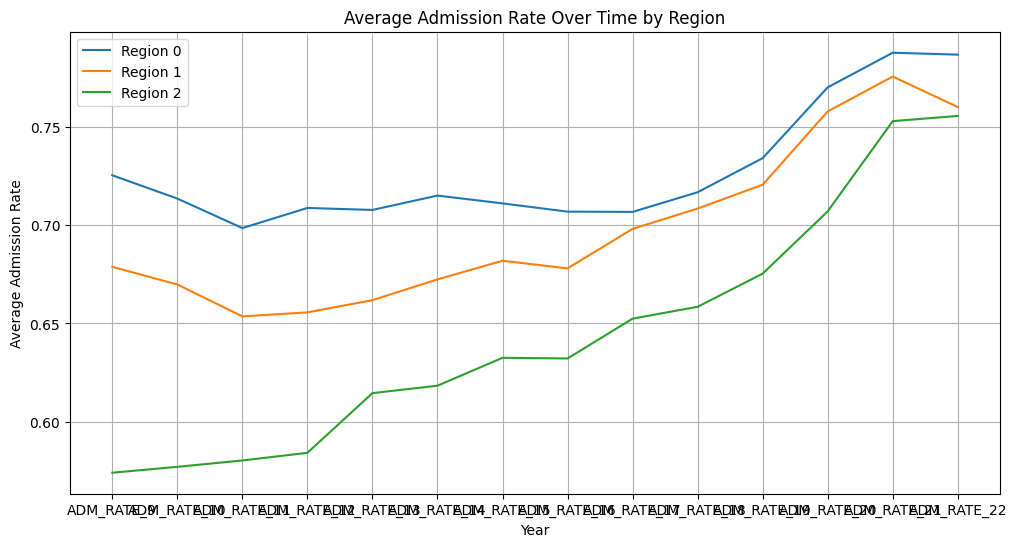

In [25]:
# prompt: create a line graph where each row is the next year

# Assuming 'transposed_regional_averages' is already defined as in the previous code.

# Plotting the line graph
plt.figure(figsize=(12, 6))
for region in transposed_regional_averages.columns:
    plt.plot(transposed_regional_averages.index, transposed_regional_averages[region], label=f'Region {region}')

plt.xlabel('Year')
plt.ylabel('Average Admission Rate')
plt.title('Average Admission Rate Over Time by Region')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# prompt: export regional transposed dataframe as csv

# Export the transposed DataFrame to a CSV file
transposed_regional_averages.to_csv('transposed_regional_averages.csv', index=True)